## Importación de librerías y carga de datos

In [2]:
#Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings

#Se quitan los warnings
warnings.filterwarnings('ignore')
#Damos formato a los Pandas
pd.set_option('display.width', 1000) 
pd.options.display.float_format = '{:,.2f}'.format 
# Carga de datos
data = pd.read_csv('PEC.Dataset.csv')
data.head()

,IdRegistro,IdCliente,Apellido,ScoreCredito,Geografia,Genero,Edad,Antiguedad,Balance,NumProductos,TarjetaCredito,MiembroActivo,SalarioEstimado,Baja
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


## Análisis de la calidad del dato

In [112]:
#Analisis de los datos por tipo y  datos no validos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdRegistro       10000 non-null  int64  
 1   IdCliente        10000 non-null  int64  
 2   Apellido         10000 non-null  object 
 3   ScoreCredito     10000 non-null  int64  
 4   Geografia        10000 non-null  object 
 5   Genero           10000 non-null  object 
 6   Edad             10000 non-null  int64  
 7   Antiguedad       10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumProductos     10000 non-null  int64  
 10  TarjetaCredito   10000 non-null  int64  
 11  MiembroActivo    10000 non-null  int64  
 12  SalarioEstimado  10000 non-null  float64
 13  Baja             10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Preparación y preproceso del dato

In [114]:
#Visualizamos posibles duplicados
data.drop_duplicates()

,IdRegistro,IdCliente,Apellido,ScoreCredito,Geografia,Genero,Edad,Antiguedad,Balance,NumProductos,TarjetaCredito,MiembroActivo,SalarioEstimado,Baja
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


In [116]:
# Imputación de valores nulos
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())


# Eliminación de duplicados
data.drop_duplicates(inplace=True)

# Codificación de variables categóricas con Label Encoder
le = LabelEncoder()
data['Geografia'] = le.fit_transform(data['Geografia'])
data['Genero'] = le.fit_transform(data['Genero'])
data['TarjetaCredito'] = le.fit_transform(data['TarjetaCredito'])
data['MiembroActivo'] = le.fit_transform(data['MiembroActivo'])

# Normalización de datos
scaler = StandardScaler()
numerical_features = ['ScoreCredito', 'Edad', 'Antiguedad', 'Balance', 'NumProductos', 'SalarioEstimado']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.describe()


,IdRegistro,IdCliente,ScoreCredito,Geografia,Genero,Edad,Antiguedad,Balance,NumProductos,TarjetaCredito,MiembroActivo,SalarioEstimado,Baja
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",-0.00,0.75,0.55,0.00,-0.00,-0.00,0.00,0.71,0.52,-0.00,0.20
std,"2,886.90","71,936.19",1.00,0.83,0.50,1.00,1.00,1.00,1.00,0.46,0.50,1.00,0.40
min,1.00,"15,565,701.00",-3.11,0.00,0.00,-1.99,-1.73,-1.23,-0.91,0.00,0.00,-1.74,0.00
25%,"2,500.75","15,628,528.25",-0.69,0.00,0.00,-0.66,-0.70,-1.23,-0.91,0.00,0.00,-0.85,0.00
50%,"5,000.50","15,690,738.00",0.02,0.00,1.00,-0.18,-0.00,0.33,-0.91,1.00,1.00,0.00,0.00
75%,"7,500.25","15,753,233.75",0.70,1.00,1.00,0.48,0.69,0.82,0.81,1.00,1.00,0.86,0.00
max,"10,000.00","15,815,690.00",2.06,2.00,1.00,5.06,1.72,2.80,4.25,1.00,1.00,1.74,1.00


## Análisis Exploratorio de Datos (EDA)

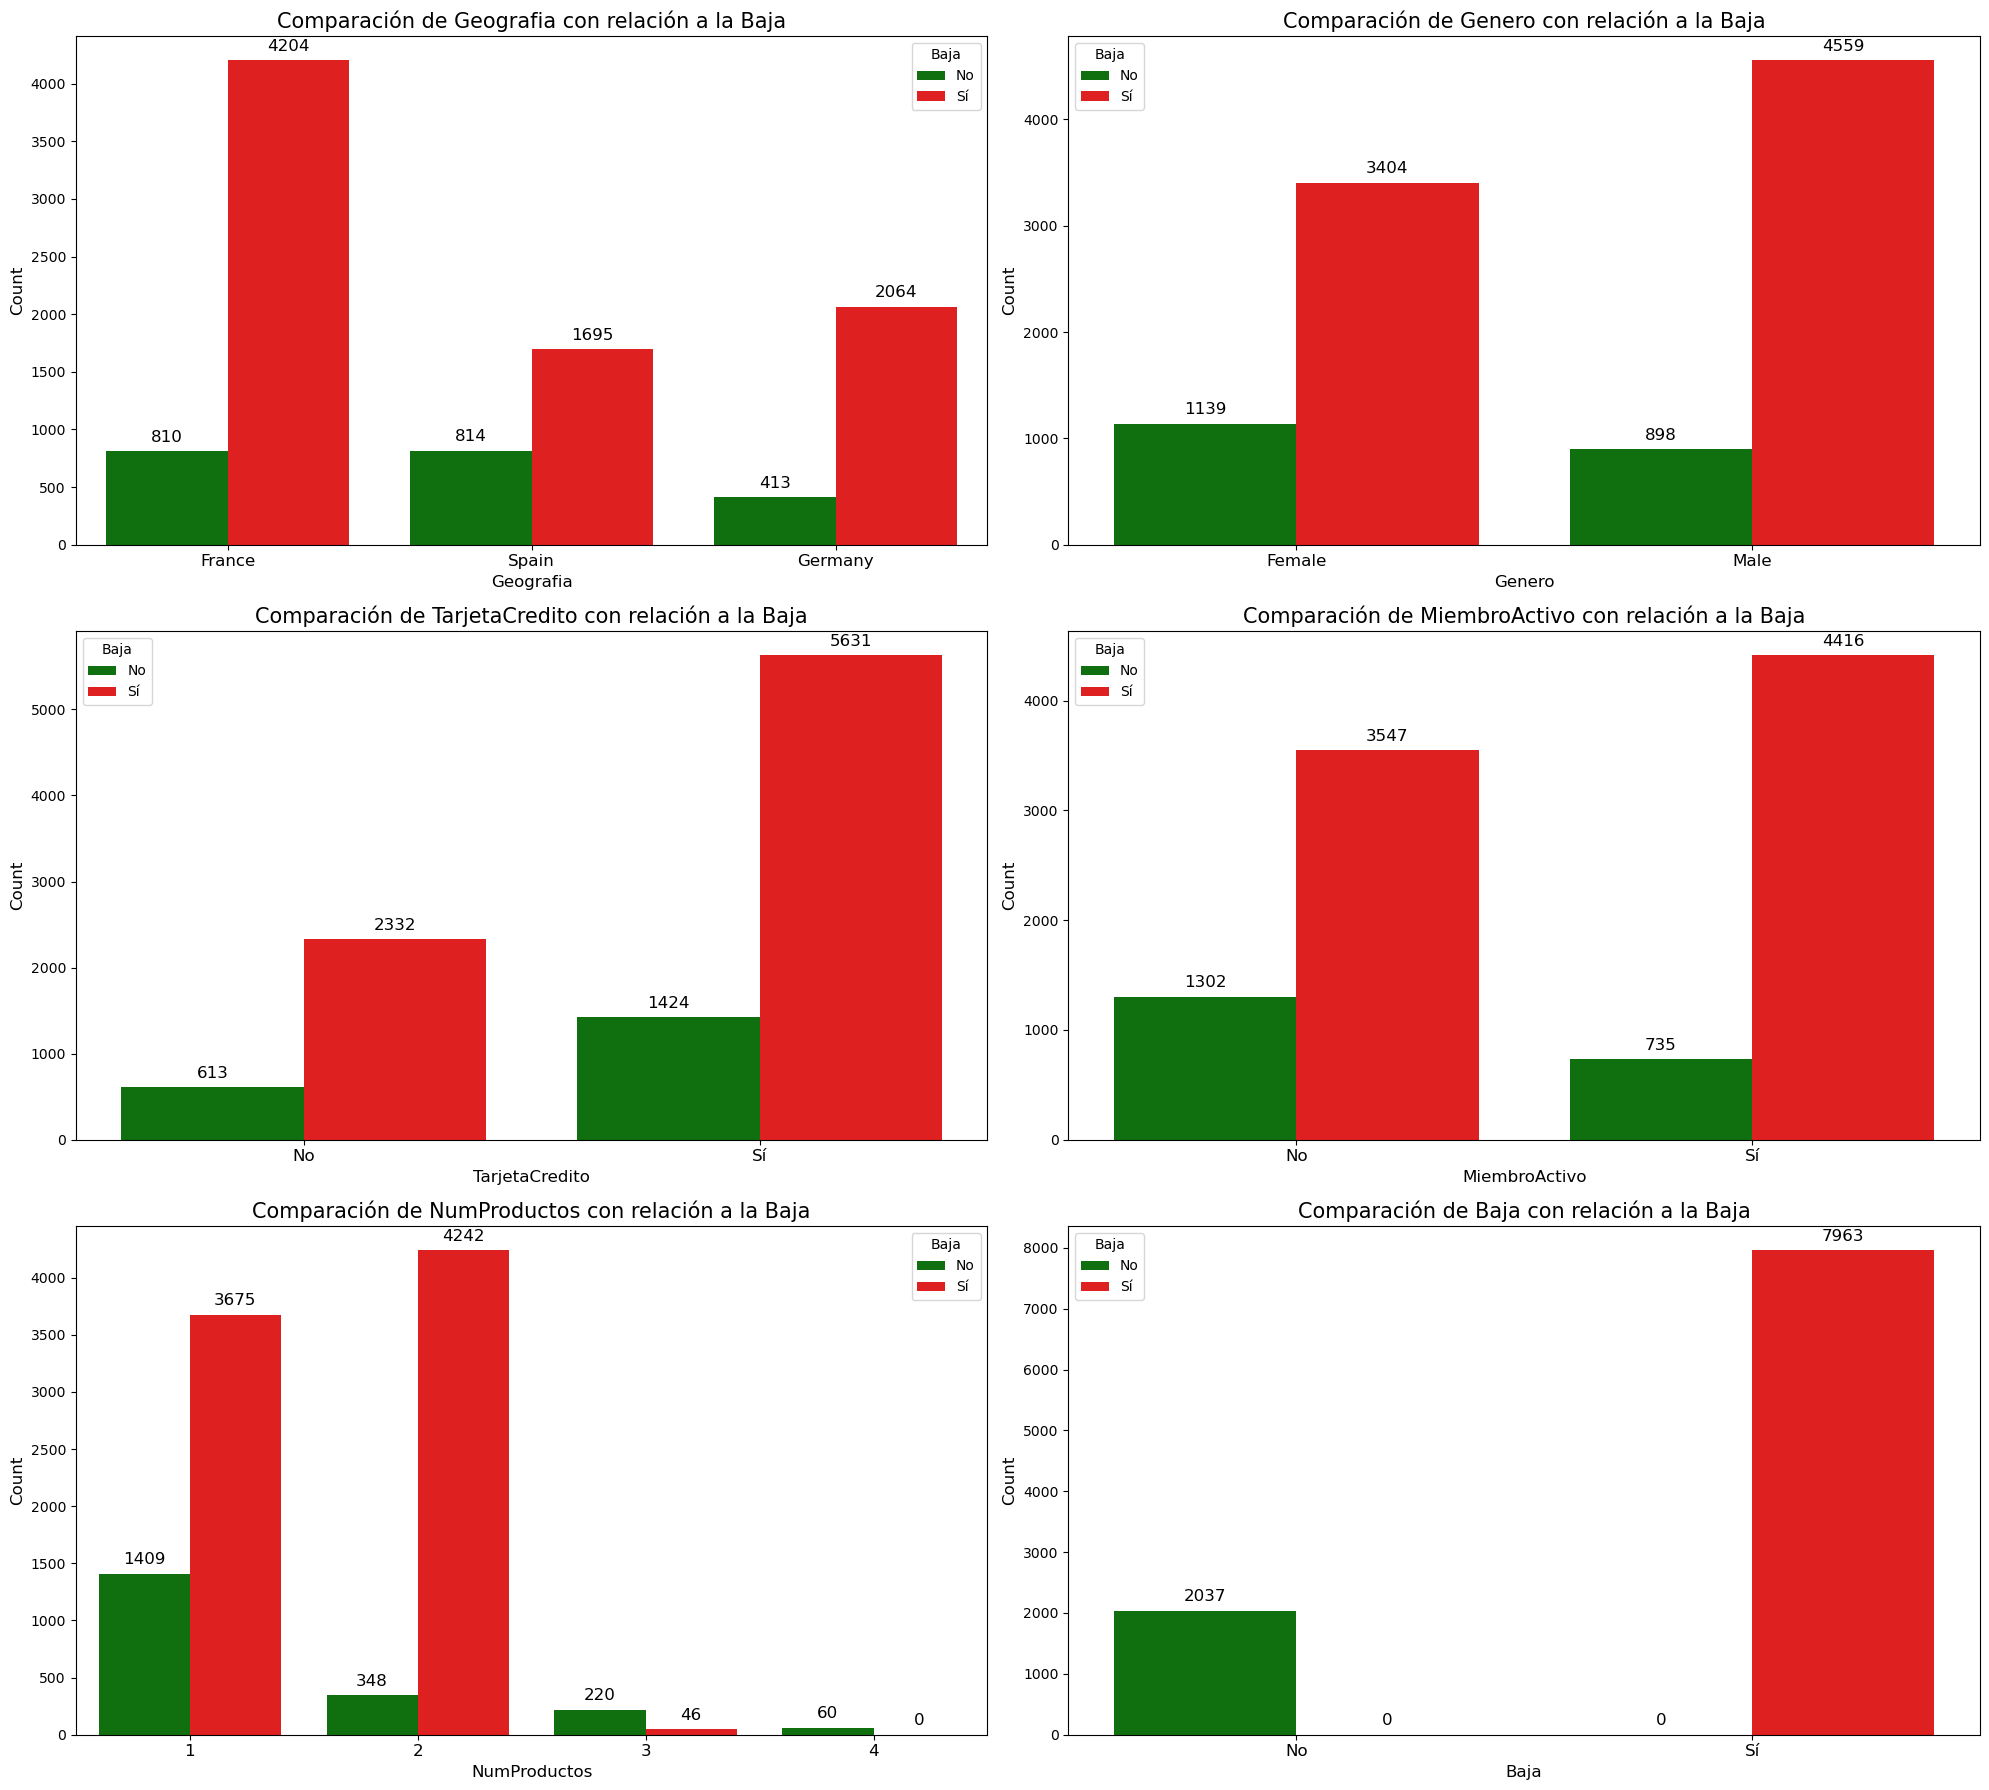

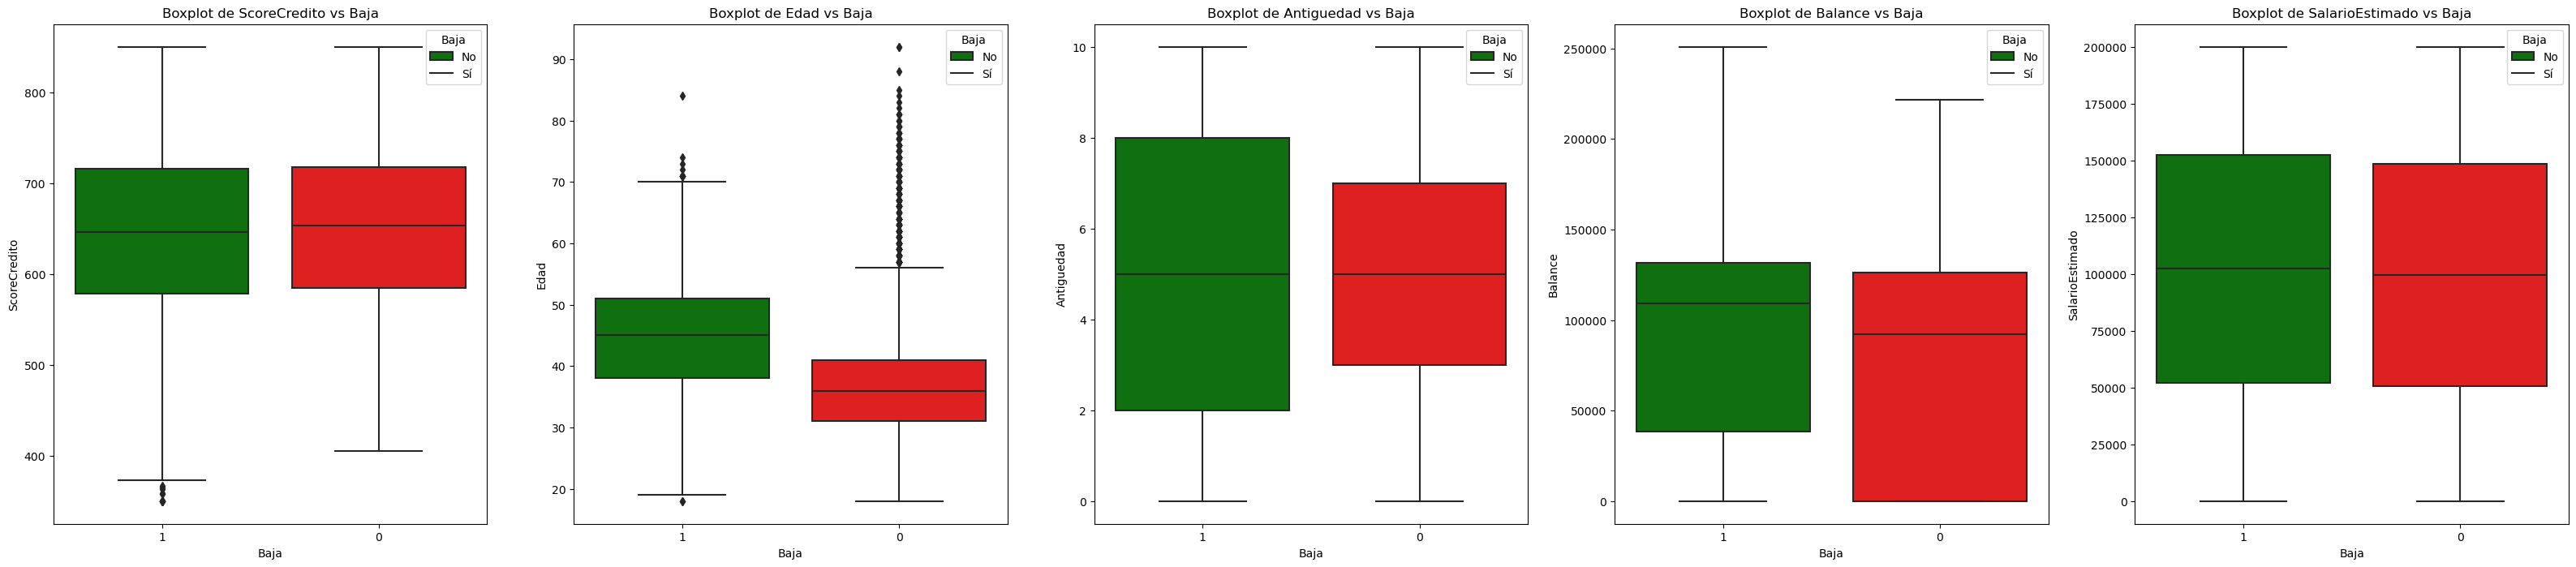

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

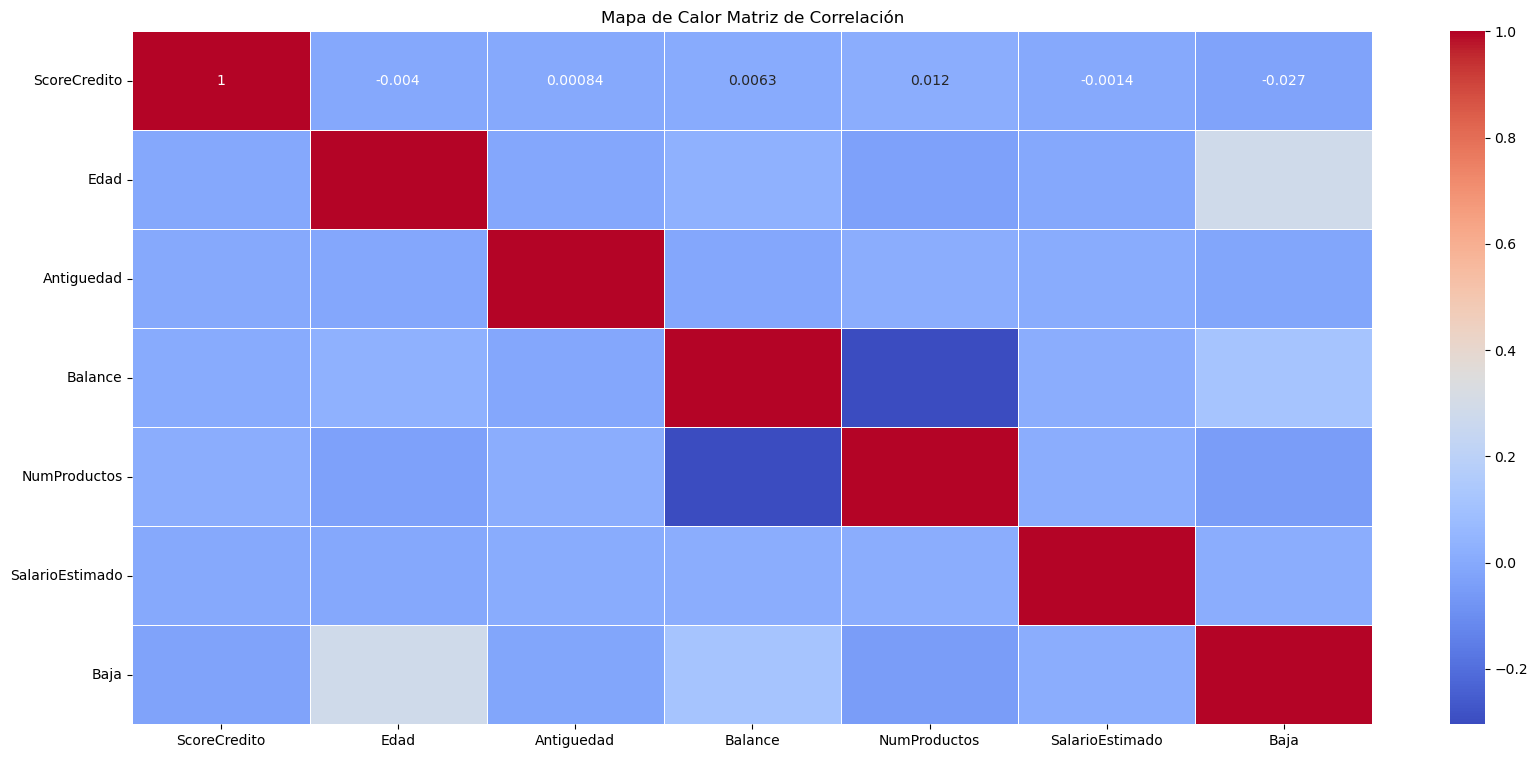

In [273]:
# Distribución de variables
# Convertir la columna 'Baja' a tipo string
data['Baja'] = data['Baja'].astype(str)

# Función para anotar valores en las barras
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points', fontsize=12, color='black')

# Función para crear gráficos de barras
def plot_bar_comparison(ax, column, data, x_labels=None):
    sns.countplot(x=column, hue='Baja', data=data, palette=sns.color_palette(['green', 'red']), ax=ax)
    ax.set_title(f'Comparación de {column} con relación a la Baja', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Baja', labels=['No', 'Sí'])
    
    # Anotar valores en las barras
    annotate_bars(ax)
    
    # Cambiar etiquetas del eje x
    if x_labels:
        ax.set_xticklabels(x_labels, fontsize=12)


# Variables categóricas a comparar
categorical_columns = ['Geografia', 'Genero', 'TarjetaCredito', 'MiembroActivo', 'NumProductos', 'Baja']
x_labels_dict = {
    'Geografia': ['France', 'Spain', 'Germany'],
    'Genero': ['Female', 'Male'],
    'TarjetaCredito': ['No', 'Sí'],
    'MiembroActivo': ['No', 'Sí'],
    'NumProductos': ['1', '2', '3', '4'],
    'Baja' : ['No', 'Sí']
}
 #Crear subplots para gráficos de barras
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

# Generar gráficos de barras para cada variable categórica
for ax, column in zip(axs.flatten(), categorical_columns):
    x_labels = x_labels_dict.get(column, None)
    plot_bar_comparison(ax, column, data, x_labels)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Convertir la columna 'Baja' a "No" y "Sí"
data['Baja'] = data['Baja'].replace({'No': 0, 'Sí': 1})

# Crear boxplots para variables numéricas vs variable baja
numvars = ['ScoreCredito', 'Edad', 'Antiguedad', 'Balance', 'SalarioEstimado']

fig, axes = plt.subplots(1, 5, figsize=(40, 8))
axes = axes.flatten()

for i, var in enumerate(numvars):
    plt.figure(figsize=(4,3))
    sns.boxplot(x='Baja', y=var, data=data, ax=axes[i], palette=sns.color_palette(['green', 'red']))
    axes[i].set_title(f'Boxplot de {var} vs Baja')
    axes[i].set_xlabel('Baja')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(20, 9))
# Seleccionar solo las columnas numéricas para la correlación
corr_matrix = data[numerical_features + ['Baja']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor Matriz de Correlación')
plt.show()

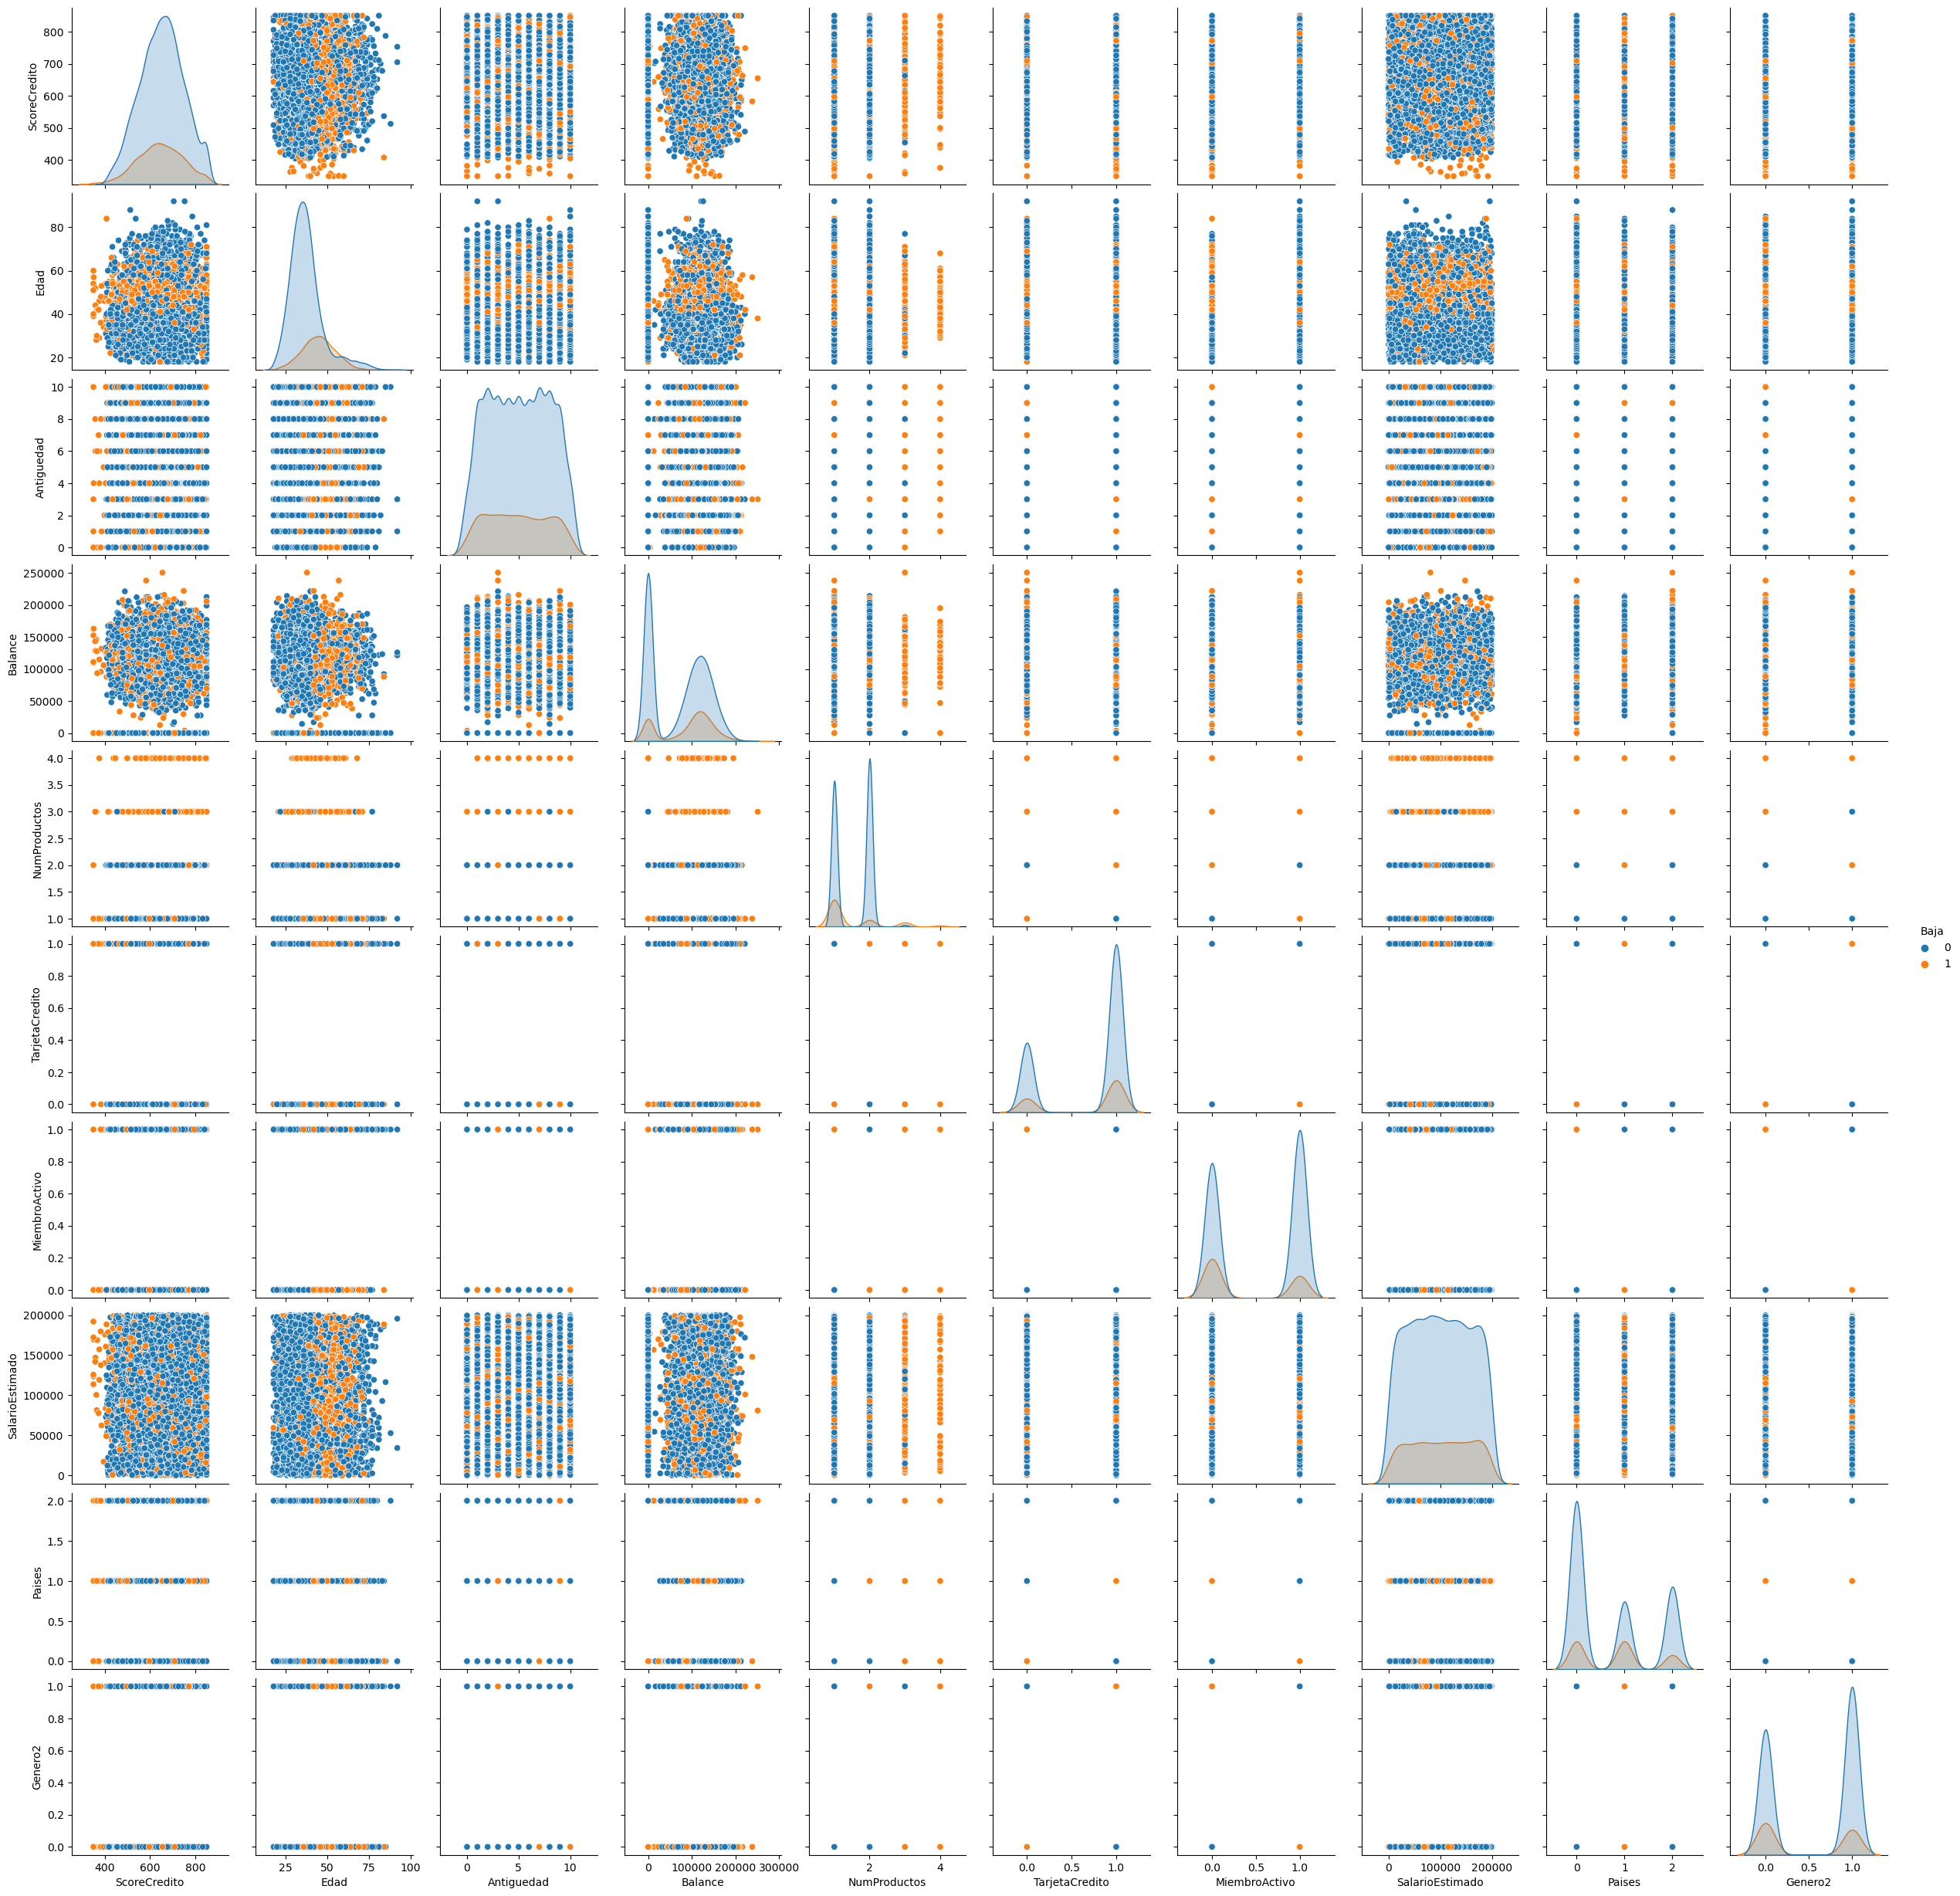

In [265]:
# Convertir las columnas a tipo categórico
data['Geografia'] = data['Geografia'].astype('category')
data['Genero'] = data['Genero'].astype('category')

# Asignar códigos a las variables categóricas
data['Paises'] = data['Geografia'].cat.codes
data['Genero2'] = data['Genero'].cat.codes

# Creación de pair plot considerando los códigos categóricos antes creados
sns.pairplot(data.drop(columns=['IdRegistro','IdCliente']), hue='Baja')
plt.show()

## 6.Modelado Predictivo

In [178]:
# División de datos
X = data.drop(columns=['IdRegistro', 'IdCliente', 'Apellido', 'Baja'])
y = data['Baja']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento y evaluación de modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000

Decision Tree Accuracy: 0.7986666666666666
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.52      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000

Random Forest Accuracy: 0.8673333333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87    

## 7.Entrenamiento del Modelo.

In [189]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Definir los modelos
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Entrenar los modelos
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier()

## Predicción de Probabilidades
### Usa los modelos entrenados para predecir las probabilidades de que cada cliente se dé de baja. Esto te permitirá identificar a los clientes con mayor riesgo.

In [191]:
# Predecir las probabilidades de baja
rf_probs = random_forest.predict_proba(X_test)[:, 1]
gb_probs = gradient_boosting.predict_proba(X_test)[:, 1]


## Identificación de Clientes de Alto Riesgo
### Establece un umbral para clasificar a los clientes como de alto riesgo. Un umbral común es 0.5

In [193]:
# Definir un umbral para clasificar a los clientes de alto riesgo
threshold = 0.5

# Identificar clientes de alto riesgo
rf_high_risk_customers = X_test[rf_probs > threshold]
gb_high_risk_customers = X_test[gb_probs > threshold]


### 8.Análisis de Clientes de Alto Riesgo
### Una vez que tienes los clientes de alto riesgo, puedes analizar sus características para entender mejor qué factores contribuyen a su posible baja.

In [277]:
# Agregar las probabilidades de baja a los datos de prueba
X_test['rf_prob'] = rf_probs
X_test['gb_prob'] = gb_probs

# Seleccionar clientes de alto riesgo
high_risk_customers = X_test[(X_test['rf_prob'] > threshold) | (X_test['gb_prob'] > threshold)]

# Ver las características de los clientes de alto riesgo
print(high_risk_customers)


      ScoreCredito Geografia Genero  Edad  Antiguedad  Balance  NumProductos  TarjetaCredito  MiembroActivo  SalarioEstimado  Paises  Genero2  rf_prob  gb_prob
2750         -1.75         0      0  1.72        1.38    -1.23          2.53               1              1             1.21       0        0     0.76     0.97
7487          0.00         0      0  1.63       -0.35    -1.23         -0.91               0              0            -0.27       0        0     0.88     0.94
5272          2.06         0      1  0.77        0.34    -1.23         -0.91               1              0             1.52       0        1     0.64     0.63
9920          0.28         0      0  0.96       -0.70     2.05         -0.91               0              1            -1.73       0        0     0.55     0.50
3337         -0.74         2      1  1.63       -0.35     0.37         -0.91               0              0            -1.66       2        1     0.61     0.78
...            ...       ...    ...   ..

## **Interpretación de Resultados**
### **Probabilidades de Baja** : rf_prob y gb_prob representan las probabilidades de baja predichas por los modelos de Random Forest y Gradient Boosting, respectivamente.
### **Clientes de Alto Riesgo**: Los clientes con rf_prob o gb_prob superiores al umbral (0.5 en este caso) son considerados de alto riesgo.
### **Análisis de Características**: Analizar las características de estos clientes puede revelar patrones o factores comunes que contribuyen a su riesgo de baja.